# Sunlight Foundation | LGBTQ Trend Report

1. [URL set](#section_1)
2. [Content Analysis](#section_2)
  1. Defining terms
  2. Getting counts
  3. Analyzing results
3. [Sentiment Analysis](#section_3)
4. [Case study: HUD](#section_4)


In [21]:
import scripts.sentiment_analysis as ta
import scripts.get_content as gc
import scripts.analysis as a
import pandas as pd
import numpy as np
import nltk
import csv
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='section_1'></a>
## 1. Constructing URL set

We got the URLs that result from searches on usa.gov's search engine on a list of terms (term_search). Then, we combined them with some previosuly wip-identified urls and then performed a visual inspection to remove any urls that our code was not able to capture (13 urls out of 295 urls). The final output from this inspection for the next section of this analysis is named links_final.csv (in the inputs folder).

In [53]:
term_search = ['lgbtq', 'lgbt', 'transgender', 'gay', 'lesbian', 'bisexual', 'queer']
usagov_search = gc.gen_usagovsearch(term_search, 5)
# this function also saves the usagov search pages in a csv in the inputs folder
potential_urls, exceptions = gc.get_hrefs(usagov_search)
# uncomment following two lines to see ouput in csv
#potential_df = pd.DataFrame(list(potential_urls))
#potential_df.to_csv('inputs/potential_urls.csv')

In [54]:
# we use the urls that were previously identified by wip
wip_urls = gc.read_csv('inputs/wip_identified.csv')
wip_urls = [url[0] for url in wip_urls]
wip_urls = set(wip_urls)
final_links = list(wip_urls.union(potential_urls))
df_links = pd.DataFrame(final_links)
df_links.to_csv('inputs/final_urls_for_visual_check.csv')

<a id='section_2'></a>
## 2. Content Analysis

#### A. Term definition

These terms were collected from: 
1. https://www.edi.nih.gov/people/sep/lgbti/safezone/terminology
2. https://www.nap.edu/read/13128/chapter/12
3. https://www.lgbthealtheducation.org/wp-content/uploads/LGBT-Glossary_March2016.pdf

In [11]:
one_word_terms = [
                 'agender',
                 'ally',
                 'aromantic',
                 'asexual',
                 'biphobia',
                 'bisexual',
                 'cisgender',
                 'gay',
                 'gender',
                 'genderqueer',
                 'glbt',
                 'heteronormativity',
                 'heterosexism',
                 'heterosexual',
                 'hiv',
                 'homophobia',
                 'intersex',
                 'lesbian',
                 'lgb',
                 'lgbt',
                 'lgbtq',
                 'msm',
                 'outing',
                 'pangender',
                 'pansexual',
                 'polyamorous',
                 'queer',
                 'questioning',
                 'serostatus',
                 'sex',
                 'straight',
                 'transexual',
                 'transgender',
                 'transgenderist',
                 'transsexual',
                 'wsw'
                 ]
two_word_terms =  [
                 ['assigned', 'sex'],
                 ['drag', 'queen'],
                 ['drag', 'king'],
                 ['gender', 'expression'],
                 ['gender', 'identity'],
                 ['gender', 'nonconforming'],
                 ['gender', 'role'],
                 ['gender', 'minority'],
                 ['gender', 'dysphoria'],
                 ['gender', 'fluid'],
                 ['gender', 'binary'],
                 ['hormone', 'therapy'],
                 ['same-sex', 'marriage'],
                 ['same-sex', 'relationship'],
                 ['same-sex', 'couple'],
                 ['same-sex', 'couples'],
                 ['same-sex', 'attraction'],
                 ['sex', 'minority'],
                 ['sex', 'reassignment'],
                 ['sexual', 'orientation'],
                 ['two', 'spirit']]
control_terms = ['heterosexual', 'straight']

#### B. Getting counts

This function gets the total number of times that each term appeared in the visible body of text in the set of analyzed urls before President Trump's inauguration and two and a half years into his administration.

In [26]:
terms = one_word_terms + two_word_terms
dates_pre = [2013, 1, 20, 2017, 1, 19]
dates_post = [2017, 1, 20, 2019, 8, 8]
output_name = 'counts_final'
gc.get_output('inputs/links_final.csv', output_name, terms, dates_pre, dates_post, store_text=True)

#### C. Analyzing results

In [48]:
multi_word_terms = two_word_terms[:]
output_name = 'counts_final' # name for outputs
department_path = 'inputs/departments_final.csv' # department names file
df_pre_merged, df_post_merged, col_names = a.get_final_df(department_path, multi_word_terms, one_word_terms, output_name)
inconsistencies = [23, 90, 146, 273] # inconsistent ids
df_pre_merged = df_pre_merged[~df_pre_merged.id.isin(inconsistencies)]
df_post_merged = df_post_merged[~df_post_merged.id.isin(inconsistencies)]
rel_changes, rel_pre, rel_post = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', pctg=True)
abs_changes = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', pctg=False)
abs_changes.to_csv('images/fig1_data.csv')
rel_changes.to_csv('images/fig2_data.csv')

# uncomment to check relative frequencies and save results
#df_pre_merged.to_csv('outputs/pre_data.csv')
#df_post_merged.to_csv('outputs/post_data.csv')
#rel_pre.sort_values()
#rel_post.sort_values()

The relative number of terms changed 1.05 %, from 0.051 to 0.052
The absolute number of terms changed 1.30 %, from 8386 to 8495


In [6]:
a.display_side_by_side(rel_changes, abs_changes)

term 
 change 
 
 
 
 
 0 
 same-sex couple 
 -100.00 
 
 
 1 
 same-sex relationship 
 -100.00 
 
 
 2 
 queer 
 -11.61 
 
 
 3 
 msm 
 -8.92 
 
 
 4 
 questioning 
 -8.12 
 
 
 5 
 glbt 
 -6.11 
 
 
 6 
 intersex 
 -5.49 
 
 
 7 
 lesbian 
 -3.75 
 
 
 8 
 gay 
 -2.73 
 
 
 9 
 sex 
 -2.66 
 
 
 10 
 lgbt 
 -2.27 
 
 
 11 
 bisexual 
 -1.93 
 
 
 12 
 gender role 
 -0.24 
 
 
 13 
 wsw 
 -0.24 
 
 
 14 
 two spirit 
 -0.24 
 
 
 15 
 genderqueer 
 -0.24 
 
 
 16 
 sex reassignment 
 -0.24 
 
 
 17 
 outing 
 -0.24 
 
 
 18 
 pansexual 
 -0.24 
 
 
 19 
 polyamorous 
 -0.24 
 
 
 20 
 heterosexism 
 -0.24 
 
 
 21 
 biphobia 
 -0.24 
 
 
 22 
 transsexual 
 -0.24 
 
 
 23 
 assigned sex 
 -0.24 
 
 
 24 
 same-sex attraction 
 -0.24 
 
 
 25 
 gender identity 
 0.47 
 
 
 26 
 sexual orientation 
 1.71 
 
 
 27 
 transgender 
 2.11 
 
 
 28 
 lgbtq 
 2.60 
 
 
 29 
 same-sex couples 
 2.98 
 
 
 30 
 straight 
 3.32 
 
 
 31 
 homophobia 
 3.75 
 
 
 32 
 gender dysphoria 
 5.46 
 
 
 33 
 same-sex marriage 
 5.63 
 
 
 34 
 gender 
 5.94 
 
 
 35 
 heterosexual 
 7.37 
 
 
 36 
 gender nonconforming 
 9.26 
 
 
 37 
 gender expression 
 9.73 
 
 
 38 
 hiv 
 13.51 
 
 
 39 
 lgb 
 15.51 
 
 
 40 
 ally 
 33.01 
 
 
 41 
 gender minority 
 58.44 
 
 
 42 
 hormone therapy 
 66.26 
 
 
 43 
 cisgender 
 inf 
 
 
 
 
 
 
 term 
 change 
 
 
 
 
 0 
 gay 
 -24.00 
 
 
 1 
 lesbian 
 -22.00 
 
 
 2 
 lgbt 
 -21.00 
 
 
 3 
 sex 
 -15.00 
 
 
 4 
 bisexual 
 -13.00 
 
 
 5 
 queer 
 -9.00 
 
 
 6 
 msm 
 -8.00 
 
 
 7 
 questioning 
 -6.00 
 
 
 8 
 glbt 
 -3.00 
 
 
 9 
 same-sex couple 
 -1.00 
 
 
 10 
 same-sex relationship 
 -1.00 
 
 
 11 
 intersex 
 -1.00 
 
 
 38 
 same-sex couples 
 1.00 
 
 
 39 
 straight 
 1.00 
 
 
 40 
 same-sex marriage 
 1.00 
 
 
 41 
 homophobia 
 1.00 
 
 
 42 
 gender dysphoria 
 2.00 
 
 
 43 
 gender nonconforming 
 2.00 
 
 
 44 
 gender identity 
 2.00 
 
 
 45 
 gender expression 
 2.00 
 
 
 46 
 ally 
 2.00 
 
 
 47 
 hormone therapy 
 4.00 
 
 
 48 
 cisgender 
 6.00 
 
 
 49 
 sexual orientation 
 7.00 
 
 
 50 
 heterosexual 
 10.00 
 
 
 51 
 gender minority 
 10.00 
 
 
 52 
 lgbtq 
 13.00 
 
 
 53 
 lgb 
 18.00 
 
 
 54 
 transgender 
 24.00 
 
 
 55 
 gender 
 37.00 
 
 
 56 
 hiv 
 90.00

*Absolute changes*

The five terms that most increased their absolute presence were “HIV”, “LGBTQ”, “gender”, “transgender” and “LGB”. The five terms that most decreased their absolute presence are: “gay”, “LGBT”, “lesbian”, “sex” and “bisexual” (Figure 2). The rise in the use of more inclusive terms (for example, “LGBTQ” as an umbrella term for “lesbian”, “gay”, “bisexual”, “LGBT”). On aggregate, there seems to be a move towards an increased use of umbrella terms like “LGBTQ” as well as an increase in the use of “transgender”. Assessing whether this is actually a positive change that has contributed to the offer of more inclusive services or not is beyond the scope of this report.

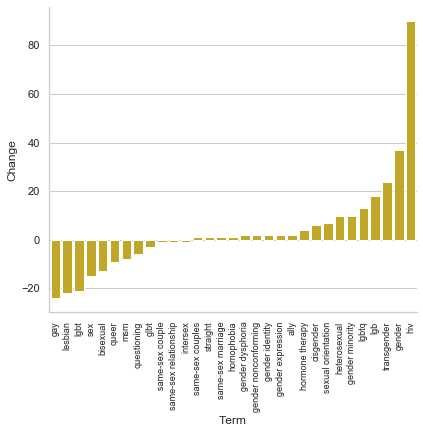

In [7]:
a.plot_bars(abs_changes, 'term', 'change')

*Relative changes*

To contextualize the observed relative changes, it must be noted that no term represents more than 0.65% of all words across the analyzed websites. Therefore, small absolute increases result in large relative increases. The five terms that most increased their relative presence were “cisgender”, “hormone therapy”, “gender minority”, “ally” and “LGB”. The five terms that saw the biggest decrease in their relative presence were “same-sex couple”, “same-sex relationship”, “queer”, “MSM” and “questioning”. None of the terms with a top 5 increase in absolute terms saw a top 5 increase in relative terms.


Note. The term cisgender did not appear before, hence the change is infinity

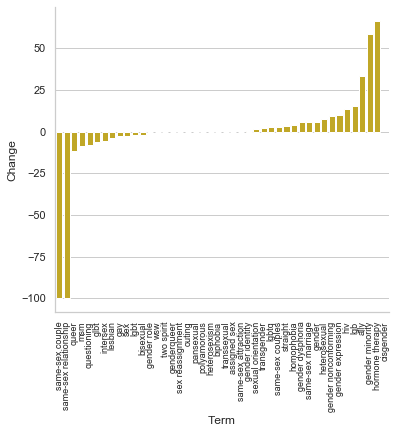

In [8]:
a.plot_bars(rel_changes, 'term', 'change')

*Changes by Department*

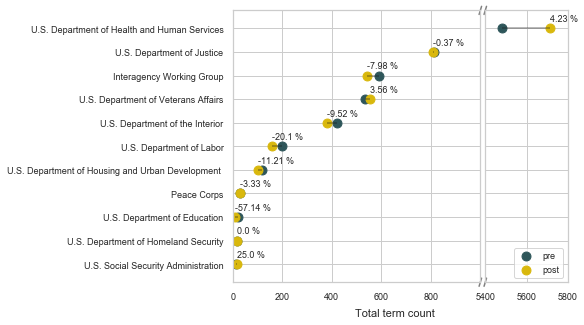

In [47]:
df = a.plot_dpt_changes(df_pre_merged, df_post_merged, col_names, control_terms)
df.to_csv('images/fig3_data.csv')

*Absolute Changes in Terms by Department*

Plots of the absolute changes by department with most changes.

In [16]:
department_list = ['U.S. Department of Health and Human Services',
                   'U.S. Department of the Interior',
                   'U.S. Department of Labor',
                   'U.S. Department of Housing and Urban Development ',
                   'U.S. Department of Education',
                   'Interagency Working Group',
                   'U.S. Department of Veterans Affairs',
                   'U.S. Department of Justice',
                   'Peace Corps',
                   'U.S. Social Security Administration']
department_pos = ['U.S. Department of Health and Human Services', 
                  'U.S. Department of the Interior', 
                  'U.S. Department of Labor']
department_neg = ['U.S. Department of Justice',
                  'Interagency Working Group',
                  'U.S. Department of the Interior',
                  'U.S. Department of Labor',
                  'U.S. Department of Housing and Urban Development ',
                  'U.S. Department of Education']

number of rows 2
U.S. Department of Health and Human Services
The absolute number of terms changed 4.37 %, from 5608 to 5853
U.S. Department of the Interior
The absolute number of terms changed -9.50 %, from 421 to 381
U.S. Department of Labor
The absolute number of terms changed -20.30 %, from 202 to 161


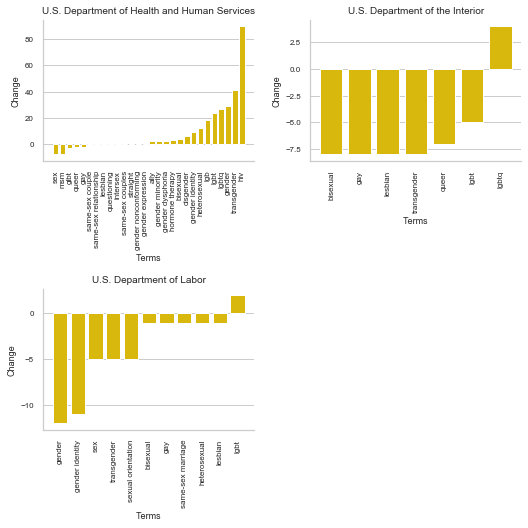

In [51]:
a.plot_changes_dept(df_pre_merged, df_post_merged, col_names, department_pos)

number of rows 3
U.S. Department of Justice
The absolute number of terms changed -0.36 %, from 825 to 822
Interagency Working Group
The absolute number of terms changed -7.86 %, from 598 to 551
U.S. Department of the Interior
The absolute number of terms changed -9.50 %, from 421 to 381
U.S. Department of Labor
The absolute number of terms changed -20.30 %, from 202 to 161
U.S. Department of Housing and Urban Development 
The absolute number of terms changed -11.21 %, from 116 to 103
U.S. Department of Education
The absolute number of terms changed -57.14 %, from 21 to 9


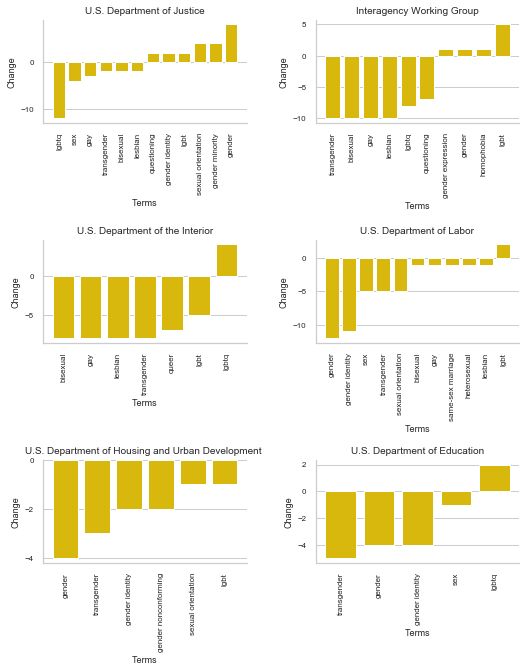

In [52]:
a.plot_changes_dept(df_pre_merged, df_post_merged, col_names, department_neg)

<a id='section_3'></a>
## 3. Tone Analysis

In this section I perform an analysis on how the tone of the content across websites has changed over time. To do so, I use the [pysentiment](https://github.com/hanzhichao2000/pysentiment) package, which uses the [Harvard IV-4](http://www.wjh.harvard.edu/~inquirer/homecat.htm) sentiment dictionary for general content analysis. The Harvard IV-4 dictionary provides a better suited alternative than other more widely used dictionaries that are tailored for social-media sentiment analysis. I use the default library's tokenizer, which converts alphabetic text to lowercase, stems it using nltk.PorterStemmer and excludes words in [predefined stoplists](https://github.com/hanzhichao2000/pysentiment/tree/master/pysentiment/static) (currencies, dates and numbers, geographic, names and other generic words). Then, I calculate the polarity and subjectivity scores of each website at both points in time (ie. pre and post) as:

* polarity(website) = (&Sigma; positive tokens - &Sigma; negative tokens) / (&Sigma; positive tokens + &Sigma; negative tokens)
 
* subjectivity(website) = (&Sigma; positive tokens - &Sigma; negative tokens) / (&Sigma; all tokens)

For the purpose of this analysis, subjectivity is more important, as I'm trying to detect any signficant changes in the way that information is conveyed across Federal government websites. The interpretation of polarity is largely restricted to each website, as the definition of what consitutes positive or negative language is not clearly captured by the dictionary that I'm using.

In [25]:
data_pre = ta.get_tone(df_pre_merged)
ta_df_pre = pd.DataFrame.from_dict(data_pre)
ta_df_pre.polarity.mean(), ta_df_pre.subjectivity.mean()
#ta_df_pre.sort_values(by='subjectivity', ascending=False)

(0.4792497881613576, 0.2851123444981216)

In [26]:
data_post = ta.get_tone(df_post_merged)
ta_df_post = pd.DataFrame.from_dict(data_post)
ta_df_post.polarity.mean(), ta_df_post.subjectivity.mean()
#ta_df_post.sort_values(by='subjectivity', ascending=False)

(0.48474776772272904, 0.29204616098675057)

With a p-value of 1.0185000412499257e-11, we reject the null hypothesis that the data was drawn from a normal distribution


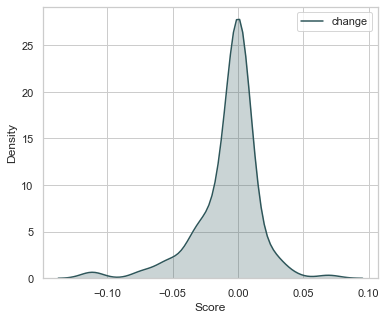

In [28]:
normality_subj = a.plot_normal(ta_df_pre, ta_df_post, 'subjectivity')

With a p-value of 2.1961794362257425e-13, we reject the null hypothesis that the data was drawn from a normal distribution


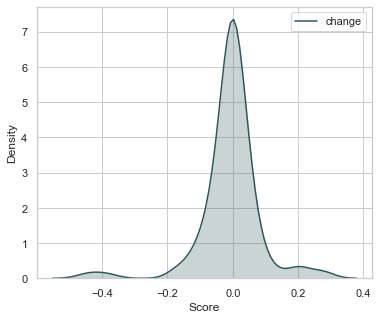

In [29]:
normality_pol = a.plot_normal(ta_df_pre, ta_df_post, 'polarity')

Since the pre post differences in polarity and subjectivity do not seem to be normally distributed (ie. they are skewed), we use the Wilcoxon test to test for the signficance of the results at the 10% level.

In [30]:
significance = 5
a.test_significance(ta_df_pre, ta_df_post, 'subjectivity', significance, normality_subj)
a.test_significance(ta_df_pre, ta_df_post, 'polarity', significance, normality_pol)

The change in subjectivity is statistically significant at the 5 %
The change in polarity is not statistically significant at the 5 %


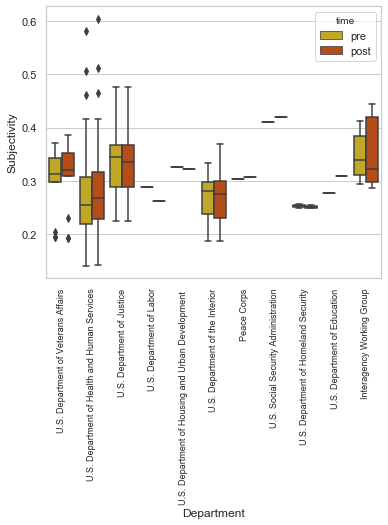

In [53]:
df = a.plot_boxplot(ta_df_pre, ta_df_post)
df.to_csv('images/fig6.csv')

<a id='section_4'></a>
## 4. Department Case Analysis: HUD

We scraped all of the available links from hud.gov and hudexchange.info through the Wayback Machine's inventory of saved URLs for each domain and ran the text content analysis from section 2 on the links.

In [44]:
# get the driver's path
driver_path = os.getcwd() + '/scripts/chromedriver'

Fetching *hud.gov*'s links

In [45]:
wayback_url = 'https://web.archive.org/web/*/www.hud.gov/*'
browser = gc.open_chrome(wayback_url, driver_path)

In [428]:
# wait to run this until wayback website is fully rendered
hud = gc.get_urls(browser, 'Jan 20, 2013', 'Jan 19, 2017', "hud/hud_links.csv")

Fetching *hudexchange.info*'s links

In [430]:
wayback_url = 'https://web.archive.org/web/*/www.hudexchange.info/*'
browser = gc.open_chrome(wayback_url, driver_path)

In [432]:
# wait to run this until wayback website is fully rendered
hud_exchange = gc.get_urls(browser, 'Jan 20, 2013', 'Jan 19, 2017', "hud/hud_exchange_links.csv")

In [437]:
# remove wayback prefix from links and save links
stored_copy = hud[:] + hud_exchange[:]
len('https://web.archive.org/web/*/')
for row in stored_copy:
    row[0] = row[0][30:]
# get rid of some undesired formats
not_accepted = ['.gif', '.pdf', '.jpg', '.png', 'lang=es', '.ppt', '.doc',
               '.rtf', 'calendar/event']
hud_links = [link[0] for link in stored_copy if not any (element in link for element in not_accepted)]
# save links
with open('inputs/links_hud.csv', 'w') as f:
    writer = csv.writer(f)
    for line in hud_links:
        writer.writerow([line])

In [438]:
# run analysis
terms = one_word_terms + two_word_terms
control_terms = ['heterosexual', 'straight']
dates_pre = [2013, 1, 20, 2017, 1, 19]
dates_post = [2017, 1, 20, 2019, 8, 22]
output_name = 'counts_hud'
gc.get_output('inputs/links_hud.csv', output_name, terms, dates_pre, dates_post, store_text=True)

In [137]:
multi_word_terms = two_word_terms[:]
output_name = 'counts_hud'
df_pre_merged, df_post_merged, col_names = a.get_final_df(department_path, multi_word_terms, one_word_terms, output_name)
inconsistencies = [67, 68, 69, 1179, 2154, 2649, 3156]
df_pre_merged = df_pre_merged[~df_pre_merged.id.isin(inconsistencies)].dropna(subset=['ttal'])
df_post_merged = df_post_merged[~df_post_merged.id.isin(inconsistencies)].dropna(subset=['ttal'])
rel_changes, rel_pre, rel_post = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', pctg=True)
abs_changes = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', pctg=False)
# uncomment to check relative frequencies
#rel_pre.sort_values()
#rel_post.sort_values()

3453
3453 3453
1486 1486
1508 1508
The relative number of terms changed -23.86 %, from 0.000 to 0.000
The absolute number of terms changed -14.17 %, from 127 to 109


In [117]:
a.display_side_by_side(rel_changes, abs_changes)

term 
 change 
 
 
 
 
 0 
 hiv 
 -47.32 
 
 
 1 
 gender identity 
 -29.03 
 
 
 2 
 gender 
 -22.37 
 
 
 3 
 sex 
 -21.14 
 
 
 4 
 transgender 
 -17.20 
 
 
 5 
 gender nonconforming 
 -11.28 
 
 
 6 
 bisexual 
 -11.28 
 
 
 7 
 lesbian 
 -11.28 
 
 
 8 
 lgbtq 
 -11.28 
 
 
 9 
 sexual orientation 
 -11.28 
 
 
 10 
 ally 
 -11.28 
 
 
 11 
 lgbt 
 -11.28 
 
 
 12 
 questioning 
 -11.28 
 
 
 13 
 gay 
 6.46 
 
 
 
 
 
 
 term 
 change 
 
 
 
 
 0 
 hiv 
 -13.00 
 
 
 1 
 gender identity 
 -2.00 
 
 
 2 
 gender 
 -2.00 
 
 
 3 
 transgender 
 -1.00 
 
 
 4 
 sex 
 -1.00 
 
 
 56 
 gay 
 1.00

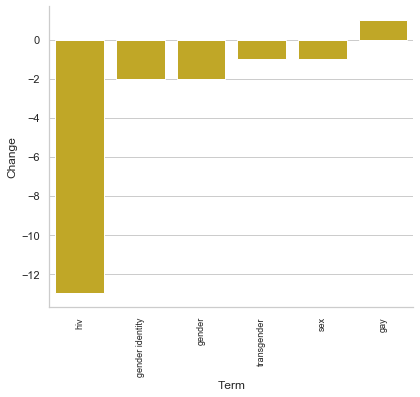

In [118]:
a.plot_bars(abs_changes, 'term', 'change')

Some sanity checking functions to check for any potential text discrepancies

Note. Avoid using iterrows!

In [87]:
for index, row in df_post_merged.iterrows():
    try:
        if len(row.text) < 5:
            print(row.id, row.url)
            print(row.text)
            print('*******')
    except Exception as e:
        continue
        #print(e)

In [92]:
for index, row in df_pre_merged.iterrows():
    try:
        if len(row.text) < 5:
            print(row.id, row.url)
            print(row.text)
            print('*******')
    except Exception as e:
        continue
        #print(e)

In [101]:
pre = set(df_pre_merged[df_pre_merged['ttal'].isnull()].id.to_list())
post = set(df_post_merged[df_post_merged['ttal'].isnull()].id.to_list())


420

In [105]:
df_pre_merged[df_pre_merged['ttal'].isnull()][col_names].sum()

agender                  0.00
ally                     0.00
aromantic                0.00
asexual                  0.00
biphobia                 0.00
bisexual                 4.00
cisgender                0.00
gay                      5.00
gender                  43.00
genderqueer              0.00
glbt                     0.00
heteronormativity        0.00
heterosexism             0.00
heterosexual             0.00
hiv                     85.00
homophobia               0.00
intersex                 0.00
lesbian                  5.00
lgb                      0.00
lgbt                    29.00
lgbtq                   26.00
msm                      0.00
outing                   0.00
pangender                0.00
pansexual                0.00
polyamorous              0.00
queer                    0.00
questioning              2.00
serostatus               0.00
sex                      7.00
straight                 1.00
transexual               0.00
transgender             28.00
transgende

In [106]:
df_post_merged[df_post_merged['ttal'].isnull()][col_names].sum()

agender                  0.00
ally                     0.00
aromantic                0.00
asexual                  0.00
biphobia                 0.00
bisexual                 4.00
cisgender                0.00
gay                      5.00
gender                  41.00
genderqueer              0.00
glbt                     0.00
heteronormativity        0.00
heterosexism             0.00
heterosexual             0.00
hiv                     94.00
homophobia               0.00
intersex                 0.00
lesbian                  5.00
lgb                      0.00
lgbt                    27.00
lgbtq                   28.00
msm                      0.00
outing                   0.00
pangender                0.00
pansexual                0.00
polyamorous              0.00
queer                    0.00
questioning              2.00
serostatus               0.00
sex                      7.00
straight                 1.00
transexual               0.00
transgender             25.00
transgende

In [132]:
df_pre_merged[df_pre_merged.id == 1410]

Empty DataFrame
Columns: [agender, ally, aromantic, asexual, biphobia, bisexual, cisgender, gay, gender, genderqueer, glbt, heteronormativity, heterosexism, heterosexual, hiv, homophobia, intersex, lesbian, lgb, lgbt, lgbtq, msm, outing, pangender, pansexual, polyamorous, queer, questioning, serostatus, sex, straight, transexual, transgender, transgenderist, transsexual, wsw, assigned sex, drag queen, drag king, gender expression, gender identity, gender nonconforming, gender role, gender minority, gender dysphoria, gender fluid, gender binary, hormone therapy, same-sex marriage, same-sex relationship, same-sex couple, same-sex couples, same-sex attraction, sex minority, sex reassignment, sexual orientation, two spirit, id, ttal, dates, text, url, results, department]
Index: []

[0 rows x 64 columns]

In [113]:
for index, row in df_pre_merged.iterrows():
    print(df_pre_merged.id, df_pre_merged.url)

3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5                                                    N

Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5                                                    None
6                                                    None
7                                                    None
8                                                    None
9                                                    None
10      http://web.archive.org/web/20130316092737id_/h...
11      http://web.archive.org/web/20130316093458id_/h...
12      http://web.archive.org/web/20130316092855id_/h...
13                                                   None
14      http://web.archive.org/web/20130316092817id_/h...
15      http://web.archive.org/web/20130316093558id_/h...
16      http://web.archive.org/web/20130316092823id_/h...
17      http://web.archive.org/web/20130316092728id_/h...
18      http://web.archive.org/web/20130316093444id_/h...
19                                 

Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5                                                    None
6                                                    None
7                                                    None
8                                                    None
9                                                    None
10      http://web.archive.org/web/20130316092737id_/h...
11      http://web.archive.org/web/20130316093458id_/h...
12      http://web.archive.org/web/20130316092855id_/h...
13                                                   None
14      http://web.archive.org/web/20130316092817id_/h...
15      http://web.archive.org/web/20130316093558id_/h...
16      http://web.archive.org/web/20130316092823id_/h...
17      http://web.archive.org/web/20130316092728id_/h...
18      http://web.archive.org/web/20130316093444id_/h...
19                                 

Name: url, Length: 1501, dtype: object
3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5              

3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5                                                    N

3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5                                                    N

Name: url, Length: 1501, dtype: object
3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5              

Name: url, Length: 1501, dtype: object
3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5              

Name: url, Length: 1501, dtype: object
3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5              

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5                                                    

Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5                                                    None
6                                                    None
7                                                    None
8                                                    None
9                                                    None
10      http://web.archive.org/web/20130316092737id_/h...
11      http://web.archive.org/web/20130316093458id_/h...
12      http://web.archive.org/web/20130316092855id_/h...
13                                                   None
14      http://web.archive.org/web/20130316092817id_/h...
15      http://web.archive.org/web/20130316093558id_/h...
16      http://web.archive.org/web/20130316092823id_/h...
17      http://web.archive.org/web/20130316092728id_/h...
18      http://web.archive.org/web/20130316093444id_/h...
19                                 

Name: url, Length: 1501, dtype: object
3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5              

Name: url, Length: 1501, dtype: object
3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5              

Name: url, Length: 1501, dtype: object
3         73
4        533
5        534
6        535
7        537
8        538
9        539
10       540
11       541
12       542
13       543
14       546
15       547
16       548
17       549
18       550
19       551
20       552
21       553
22       554
23       555
24       556
25       557
26       561
27       566
28       567
29       568
30       569
31       571
32       572
        ... 
1478    3319
1479    3320
1480    3321
1481    3322
1482    3323
1483    3324
1484    3326
1485    3328
1486    3330
1487    3332
1488    3333
1489    3334
1490    3335
1491    3336
1492    3337
1493    3338
1494    3339
1495    3340
1496    3341
1497    3342
1498    3343
1499    3344
1500    3345
1501    3346
1502    3347
1503    3348
1504    3350
1505    3351
1506    3352
1507    3354
Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5              

Name: id, Length: 1501, dtype: int64 3       http://web.archive.org/web/20150426020117id_/h...
4                                                    None
5                                                    None
6                                                    None
7                                                    None
8                                                    None
9                                                    None
10      http://web.archive.org/web/20130316092737id_/h...
11      http://web.archive.org/web/20130316093458id_/h...
12      http://web.archive.org/web/20130316092855id_/h...
13                                                   None
14      http://web.archive.org/web/20130316092817id_/h...
15      http://web.archive.org/web/20130316093558id_/h...
16      http://web.archive.org/web/20130316092823id_/h...
17      http://web.archive.org/web/20130316092728id_/h...
18      http://web.archive.org/web/20130316093444id_/h...
19                                 

In [144]:
pickle_file = 'outputs/snapshots_{}.txt'.format(output_name)
df_pre_additional, df_post_additional, col_names = a.fetch_additional_data(
                                                       pickle_file,
                                                       multi_word_terms,
                                                       one_word_terms)

3453
3453 3354


In [142]:
df_pre_additional[df_pre_additional.duplicated(subset=['id'])]

id    ttal                dates  \
521    521     nan                 None   
525    525     nan                 None   
526    525     nan                 None   
527    525     nan                 None   
528    525     nan                 None   
529    525     nan                 None   
531    531     nan                 None   
575    575  420.00  2015-04-25 09:48:23   
739    739     nan                 None   
749    749   59.00  2016-06-29 12:40:22   
751    751     nan                 None   
758    758     nan                 None   
761    761     nan                 None   
762    761     nan                 None   
766    766     nan                 None   
768    768  562.00  2015-02-15 13:36:13   
769    768  562.00  2015-02-15 13:36:13   
777    777  435.00  2015-08-01 19:58:29   
793    793     nan                 None   
794    793     nan                 None   
795    793     nan                 None   
891    891     nan                 None   
892    891     nan                 None   
898    898     nan                 None   
904    904  756.00  2015-04-25 03:41:18   
906    906  985.00  2016-12-18 19:54:56   
907    906  985.00  2016-12-18 19:54:56   
909    909     nan                 None   
911    911  514.00  2016-12-23 04:01:21   
1131  1131     nan                 None   
...    ...     ...                  ...   
1558  1558     nan                 None   
1570  1570 1101.00  2016-04-27 14:28:20   
1571  1570 1101.00  2016-04-27 14:28:20   
1572  1570 1101.00  2016-04-27 14:28:20   
1573  1570 1101.00  2016-04-27 14:28:20   
1574  1570 1101.00  2016-04-27 14:28:20   
1575  1570 1101.00  2016-04-27 14:28:20   
1581  1581     nan                 None   
1582  1581     nan                 None   
1587  1587     nan                 None   
1610  1610     nan                 None   
1662  1662     nan                 None   
1666  1666  530.00  2016-12-23 10:11:38   
2146  2146 1083.00  2015-06-20 01:47:11   
2180  2180  203.00  2017-01-18 20:25:08   
2197  2197  526.00  2016-12-27 20:44:03   
2258  2258 2636.00  2016-12-05 10:19:50   
2315  2315  328.00  2017-01-18 18:24:58   
2347  2347  444.00  2017-01-18 20:25:55   
2512  2512     nan                 None   
2513  2512     nan                 None   
2514  2512     nan                 None   
2515  2512     nan                 None   
2516  2512     nan                 None   
2688  2688   82.00  2015-09-19 00:56:10   
2799  2799  262.00  2016-05-28 19:42:30   
2840  2840  203.00  2016-12-31 03:20:44   
3215  3215  325.00  2016-06-23 18:56:28   
3289  3289  141.00  2016-09-13 14:07:26   
3382  3382  147.00  2017-01-18 20:24:23   

                                                   text  \
521                                                None   
525                                                None   
526                                                None   
527                                                None   
528                                                None   
529                                                None   
531                                                None   
575   [Skip to Content, Community Development Block ...   
739                                                None   
749   [Skip to Content, Affordable Housing, Programs...   
751                                                None   
758                                                None   
761                                                None   
762                                                None   
766                                                None   
768   [Skip to Content, National Disaster Resilience...   
769   [Skip to Content, National Disaster Resilience...   
777   [Skip to Content, Continuum of Care (CoC) Prog...   
793                                                None   
794                                                None   
795                                                None   
891                                        

In [129]:
df_post_additional[df_post_additional.id == 1410]

id    ttal                dates  \
1409  1410 2503.00  2019-08-10 09:42:41   
1410  1410 2503.00  2019-08-10 09:42:41   

                                                   text  \
1409  [Home, Log-in, Programs, Resources, Resource L...   
1410  [Home, Log-in, Programs, Resources, Resource L...   

                                                    url  \
1409  http://web.archive.org/web/20190810094241id_/h...   
1410  http://web.archive.org/web/20190810094241id_/h...   

                                                results  
1409  [0, 0, 0, 0, 0, 2, 0, 2, 13, 0, 0, 0, 0, 0, 0,...  
1410  [0, 0, 0, 0, 0, 2, 0, 2, 13, 0, 0, 0, 0, 0, 0,...

'outputs/snapshots_counts_hud.txt'